In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import spacy

In [2]:
df_train=pd.read_csv('twitter_training.csv')
df_val=pd.read_csv('twitter_validation.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df_train['Positive'].value_counts()

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

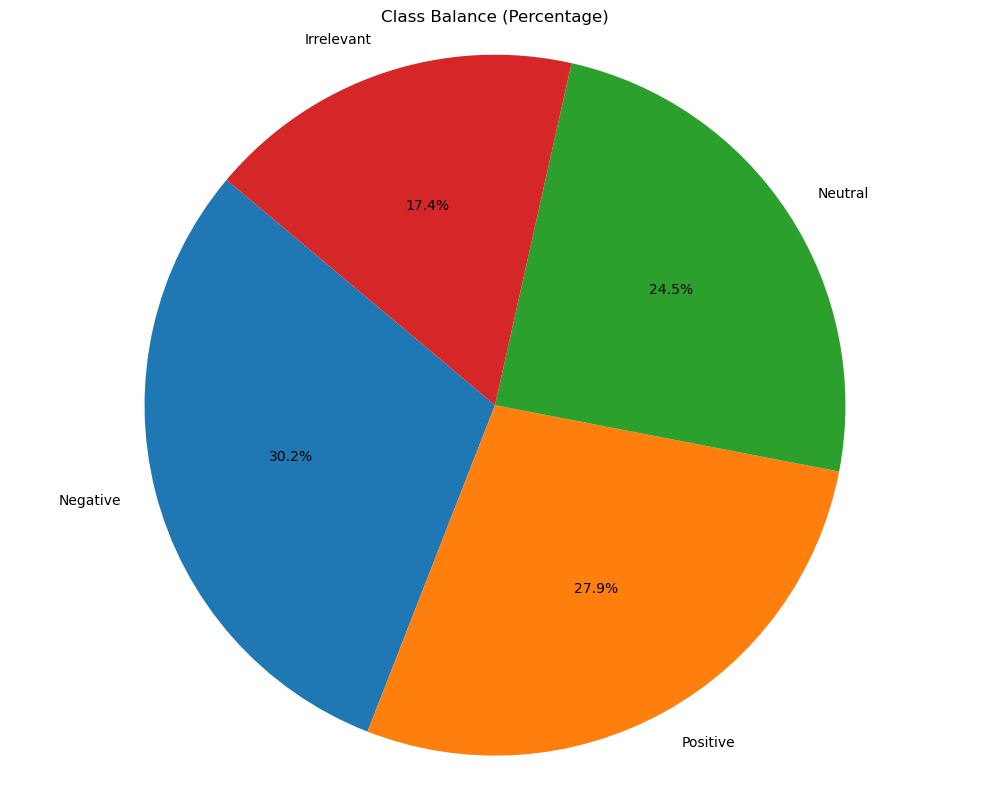

In [5]:
# Calculate class counts
class_counts = df_train['Positive'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Calculate the total number of images in train_df
total_images = len(df_train)

# Calculate the percentage for each class based on the total number of images
class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100

# Sort the dataframe by count
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create the pie chart using matplotlib
plt.figure(figsize=(10, 8))
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [6]:
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    if pd.isnull(text):
        return ""
    # Tokenize the text and remove stop words and punctuation
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(filtered_tokens)


In [7]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df_train.rename(columns={"im getting on borderlands and i will murder you all ,": "text"}, inplace=True)

In [9]:
df_train['text']=df_train['text'].apply(preprocess)

In [10]:
df_train

,2401,Borderlands,Positive,text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,m get borderland kill
2,2401,Borderlands,Positive,m come borderland murder
3,2401,Borderlands,Positive,m get borderland 2 murder
4,2401,Borderlands,Positive,m get borderland murder
...,...,...,...,...
74676,9200,Nvidia,Positive,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,Positive,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,Positive,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,Positive,realize window partition Mac like 6 year Nvidi...


In [11]:
le = LabelEncoder()
df_train['Positive'] = le.fit_transform(df_train['Positive'])
df_train

,2401,Borderlands,Positive,text
0,2401,Borderlands,3,come border kill
1,2401,Borderlands,3,m get borderland kill
2,2401,Borderlands,3,m come borderland murder
3,2401,Borderlands,3,m get borderland 2 murder
4,2401,Borderlands,3,m get borderland murder
...,...,...,...,...
74676,9200,Nvidia,3,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,3,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,3,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,3,realize window partition Mac like 6 year Nvidi...


In [12]:
df_val.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [13]:
df_val.rename(columns={"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "text"}, inplace=True)

In [14]:
df_val

,3364,Facebook,Irrelevant,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df_val['text']=df_val['text'].apply(preprocess) 
df_val

,3364,Facebook,Irrelevant,text
0,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos reject claim c...
1,8312,Microsoft,Negative,@microsoft pay word function poorly @samsungu ...
2,4371,CS-GO,Negative,csgo matchmaking closet hacking truly awful game
3,4433,Google,Neutral,President slap Americans face commit unlawful ...
4,6273,FIFA,Negative,hi @eahelp Madeleine McCann cellar past 13 yea...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐ ️ Toronto art culture capital Canada wonder ...
995,4359,CS-GO,Irrelevant,ACTUALLY good tot bring viewer \n\n people get...
996,2652,Borderlands,Positive,today suck time drink wine n play borderland s...
997,8069,Microsoft,Positive,buy fraction Microsoft today small win


In [16]:
df_val['Irrelevant'] = le.fit_transform(df_val['Irrelevant'])
df_val

,3364,Facebook,Irrelevant,text
0,352,Amazon,2,BBC News Amazon boss Jeff Bezos reject claim c...
1,8312,Microsoft,1,@microsoft pay word function poorly @samsungu ...
2,4371,CS-GO,1,csgo matchmaking closet hacking truly awful game
3,4433,Google,2,President slap Americans face commit unlawful ...
4,6273,FIFA,1,hi @eahelp Madeleine McCann cellar past 13 yea...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),0,⭐ ️ Toronto art culture capital Canada wonder ...
995,4359,CS-GO,0,ACTUALLY good tot bring viewer \n\n people get...
996,2652,Borderlands,3,today suck time drink wine n play borderland s...
997,8069,Microsoft,3,buy fraction Microsoft today small win


In [17]:
column_name=['tweetID','entity','sentiment','tweet_content']
df_train.columns=column_name
df_val.columns=column_name
combined_df = pd.concat([df_train, df_val], ignore_index=True)
combined_df

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,3,come border kill
1,2401,Borderlands,3,m get borderland kill
2,2401,Borderlands,3,m come borderland murder
3,2401,Borderlands,3,m get borderland 2 murder
4,2401,Borderlands,3,m get borderland murder
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),0,⭐ ️ Toronto art culture capital Canada wonder ...
75676,4359,CS-GO,0,ACTUALLY good tot bring viewer \n\n people get...
75677,2652,Borderlands,3,today suck time drink wine n play borderland s...
75678,8069,Microsoft,3,buy fraction Microsoft today small win


In [18]:
X_train, X_test, y_train, y_test = train_test_split(combined_df['tweet_content'], combined_df['sentiment'], 
                                                    test_size=0.2, random_state=42, stratify=combined_df['sentiment'])

In [19]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('RandomForest', (RandomForestClassifier()))          
])

In [20]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [21]:
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9038054968287527


In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  int32 
 3   tweet_content  75680 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 2.0+ MB


In [23]:
combined_df.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,3,come border kill
1,2401,Borderlands,3,m get borderland kill
2,2401,Borderlands,3,m come borderland murder
3,2401,Borderlands,3,m get borderland 2 murder
4,2401,Borderlands,3,m get borderland murder


In [24]:
combined_df.columns.tolist()

['tweetID', 'entity', 'sentiment', 'tweet_content']

- the info for each coloumn
- info content:(name of column,nonnull values in the data,type of the column)

# Cleaning Data

In [25]:
#Check the null values of the data
combined_df.isnull().sum()

tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [26]:
#check the duplicated values in the data
combined_df.duplicated().sum()

8451

In [27]:
#Remove the all null values and duplicated values:
#Then check for the cleaning:
combined_df.dropna(inplace=True)
combined_df.drop_duplicates(inplace=True)
print("null values:","\n",combined_df.isnull().sum())
print("duplicated values:",combined_df.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


# Visualizations

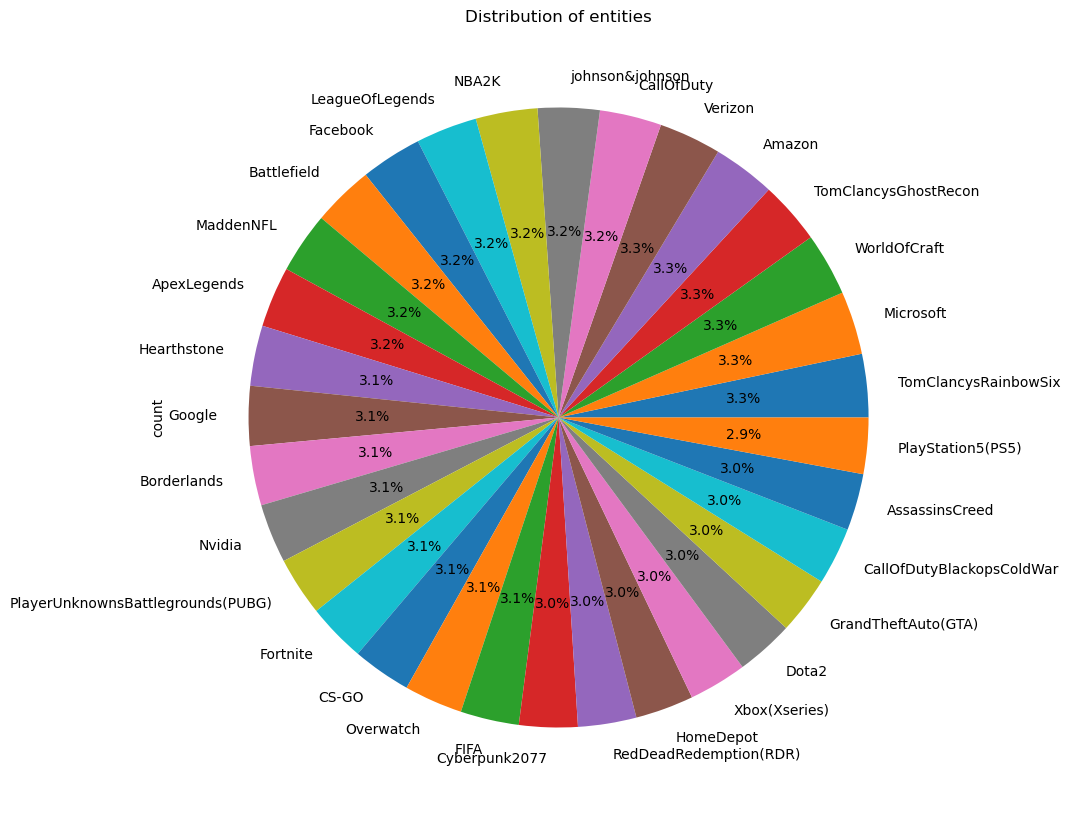

In [28]:
entity_content=combined_df['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

<Axes: xlabel='sentiment'>

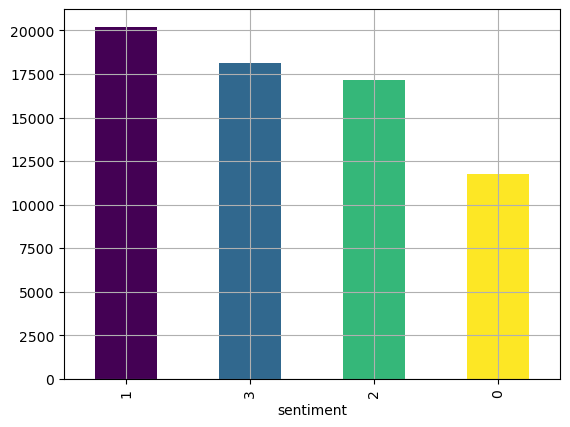

In [29]:
# we can see from the above plot the entities of the tweets are mostly equals
sentiment_content=combined_df['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

- at the above figure we can see the number of the negative reactions are above to 20000
- the min number of the reactions are the number of the irrelevant reactions are less tan 12500

<Axes: xlabel='entity'>

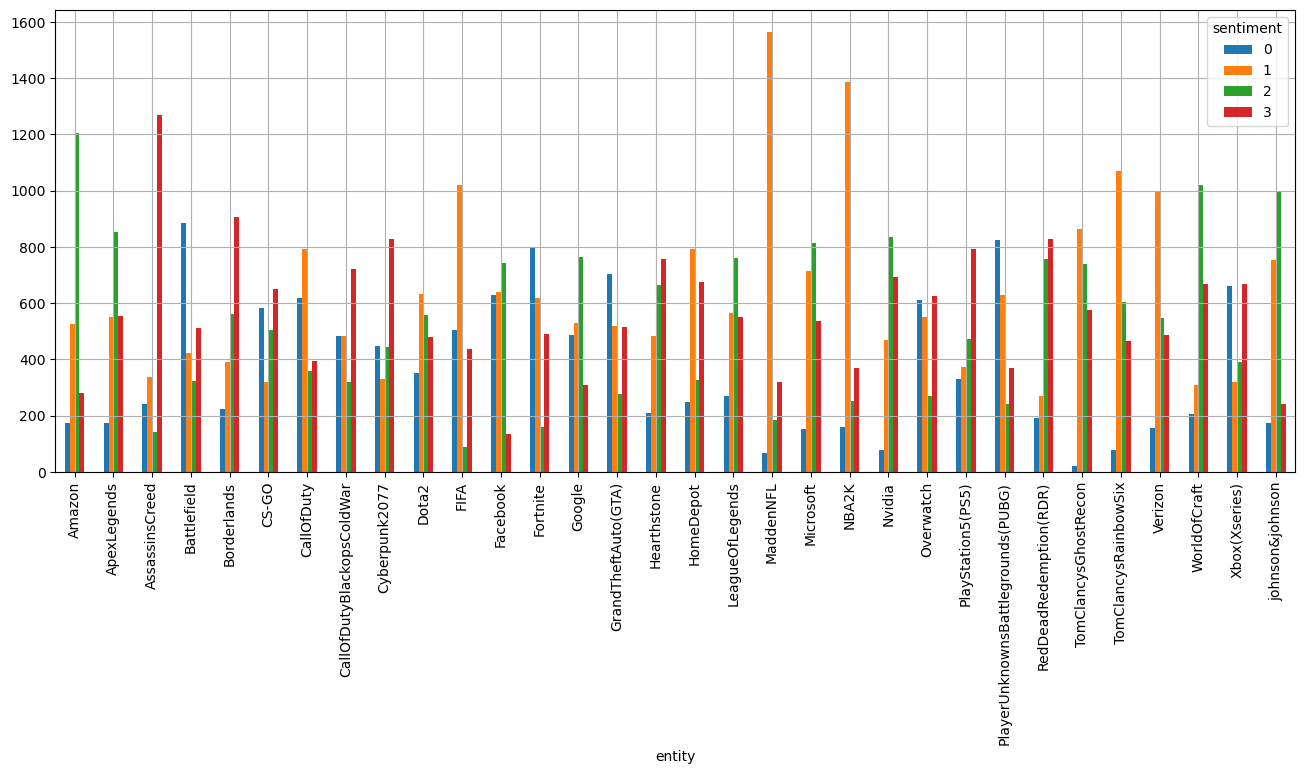

In [30]:
reactions_entities = pd.crosstab(combined_df['entity'],combined_df['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

- From the above figure the highest negative reactions in the MaddenNFL entity
- The highest  irrelevant reactions in the Battlefield entity 
- The highest  neutral reactions in the Amazon entity 
- The highest  positive reactions in the AssassinsCreed entity 